# **Lab 6: Ordinary Least Square Regression**

# **Initialization**

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

# **Ordinary Least Square Regression Problems**

In this experiment we will do Ordinary least square (multiple) regression for the prediction of Graduate Admissions from an Indian Bangladeshi perspective.

The dataset can be obtained from

[Graduate Admission 2](https://www.kaggle.com/mohansacharya/graduate-admissions)

The dataset (Admission_Predict.csv) contains seven features arranged into columns in a CSV file. 

There are 400 sample datapoints. The features are as follows:

1. GRE Scores (out of 340)
2. TOEFL Scores (out of 120)
3. University Rating (out of 5)
4. Statement of Purpose and Letter of Recommendation Strength (out of 5)
5. Undergraduate GPA (out of 10)
6. Research Experience (either 0 or 1)
7. Chance of Admit (ranging from 0 to 1)

The first column of the dataset contains a serial number, and the final column provide the probability of getting admission, i.e. the target output for each datapoint.

For convenience the dataset is already given below.

In [ ]:
attributes = ['Serial No.', 
              'GRE Score',
              'TOEFL Score',
              'University Rating',
              'SOP',	
              'LOR',	
              'CGPA',
              'Research',	
              'Chance of Admit']

data_points = np.array([[1, 337, 118, 4, 4.5, 4.5, 9.65, 1, 0.92],
                      [2, 324, 107, 4, 4, 4.5, 8.87, 1, 0.76],
                      [3, 316, 104, 3, 3, 3.5, 8, 1, 0.72],
                      [4, 322, 110, 3, 3.5, 2.5, 8.67, 1, 0.8],
                      [5, 314, 103, 2, 2, 3, 8.21, 0, 0.65],
                      [6, 330, 115, 5, 4.5, 3, 9.34, 1, 0.9],
                      [7, 321, 109, 3, 3, 4, 8.2, 1, 0.75],
                      [8, 308, 101, 2, 3, 4, 7.9, 0, 0.68],
                      [9, 302, 102, 1, 2, 1.5, 8, 0, 0.5],
                      [10, 323, 108, 3, 3.5, 3, 8.6, 0, 0.45],
                      [11, 325, 106, 3, 3.5, 4, 8.4, 1, 0.52],
                      [12, 327, 111, 4, 4, 4.5, 9, 1, 0.84],
                      [13, 328, 112, 4, 4, 4.5, 9.1, 1, 0.78],
                      [14, 307, 109, 3, 4, 3, 8, 1, 0.62],
                      [15, 311, 104, 3, 3.5, 2, 8.2, 1, 0.61],
                      [16, 314, 105, 3, 3.5, 2.5, 8.3, 0, 0.54],
                      [17, 317, 107, 3, 4, 3, 8.7, 0, 0.66],
                      [18, 319, 106, 3, 4, 3, 8, 1, 0.65],
                      [19, 318, 110, 3, 4, 3, 8.8, 0, 0.63],
                      [20, 303, 102, 3, 3.5, 3, 8.5, 0, 0.62],
                      [21, 312, 107, 3, 3, 2, 7.9, 1, 0.64],
                      [22, 325, 114, 4, 3, 2, 8.4, 0, 0.7],
                      [23, 328, 116, 5, 5, 5, 9.5, 1, 0.94],
                      [24, 334, 119, 5, 5, 4.5, 9.7, 1, 0.95],
                      [25, 336, 119, 5, 4, 3.5, 9.8, 1, 0.97],
                      [26, 340, 120, 5, 4.5, 4.5, 9.6, 1, 0.94],
                      [27, 322, 109, 5, 4.5, 3.5, 8.8, 0, 0.76],
                      [28, 298, 98, 2, 1.5, 2.5, 7.5, 1, 0.44],
                      [29, 295, 93, 1, 2, 2, 7.2, 0, 0.46],
                      [30, 310, 99, 2, 1.5, 2, 7.3, 0, 0.54],
                      [31, 300, 97, 2, 3, 3, 8.1, 1, 0.65],
                      [32, 327, 103, 3, 4, 4, 8.3, 1, 0.74],
                      [33, 338, 118, 4, 3, 4.5, 9.4, 1, 0.91],
                      [34, 340, 114, 5, 4, 4, 9.6, 1, 0.9],
                      [35, 331, 112, 5, 4, 5, 9.8, 1, 0.94],
                      [36, 320, 110, 5, 5, 5, 9.2, 1, 0.88],
                      [37, 299, 106, 2, 4, 4, 8.4, 0, 0.64],
                      [38, 300, 105, 1, 1, 2, 7.8, 0, 0.58],
                      [39, 304, 105, 1, 3, 1.5, 7.5, 0, 0.52],
                      [40, 307, 108, 2, 4, 3.5, 7.7, 0, 0.48],
                      [41, 308, 110, 3, 3.5, 3, 8, 1, 0.46],
                      [42, 316, 105, 2, 2.5, 2.5, 8.2, 1, 0.49],
                      [43, 313, 107, 2, 2.5, 2, 8.5, 1, 0.53],
                      [44, 332, 117, 4, 4.5, 4, 9.1, 0, 0.87],
                      [45, 326, 113, 5, 4.5, 4, 9.4, 1, 0.91],
                      [46, 322, 110, 5, 5, 4, 9.1, 1, 0.88],
                      [47, 329, 114, 5, 4, 5, 9.3, 1, 0.86],
                      [48, 339, 119, 5, 4.5, 4, 9.7, 0, 0.89],
                      [49, 321, 110, 3, 3.5, 5, 8.85, 1, 0.82],
                      [50, 327, 111, 4, 3, 4, 8.4, 1, 0.78],
                      [51, 313, 98, 3, 2.5, 4.5, 8.3, 1, 0.76],
                      [52, 312, 100, 2, 1.5, 3.5, 7.9, 1, 0.56],
                      [53, 334, 116, 4, 4, 3, 8, 1, 0.78],
                      [54, 324, 112, 4, 4, 2.5, 8.1, 1, 0.72],
                      [55, 322, 110, 3, 3, 3.5, 8, 0, 0.7],
                      [56, 320, 103, 3, 3, 3, 7.7, 0, 0.64],
                      [57, 316, 102, 3, 2, 3, 7.4, 0, 0.64],
                      [58, 298, 99, 2, 4, 2, 7.6, 0, 0.46],
                      [59, 300, 99, 1, 3, 2, 6.8, 1, 0.36],
                      [60, 311, 104, 2, 2, 2, 8.3, 0, 0.42],
                      [61, 309, 100, 2, 3, 3, 8.1, 0, 0.48],
                      [62, 307, 101, 3, 4, 3, 8.2, 0, 0.47],
                      [63, 304, 105, 2, 3, 3, 8.2, 1, 0.54],
                      [64, 315, 107, 2, 4, 3, 8.5, 1, 0.56],
                      [65, 325, 111, 3, 3, 3.5, 8.7, 0, 0.52],
                      [66, 325, 112, 4, 3.5, 3.5, 8.92, 0, 0.55],
                      [67, 327, 114, 3, 3, 3, 9.02, 0, 0.61],
                      [68, 316, 107, 2, 3.5, 3.5, 8.64, 1, 0.57],
                      [69, 318, 109, 3, 3.5, 4, 9.22, 1, 0.68],
                      [70, 328, 115, 4, 4.5, 4, 9.16, 1, 0.78],
                      [71, 332, 118, 5, 5, 5, 9.64, 1, 0.94],
                      [72, 336, 112, 5, 5, 5, 9.76, 1, 0.96],
                      [73, 321, 111, 5, 5, 5, 9.45, 1, 0.93],
                      [74, 314, 108, 4, 4.5, 4, 9.04, 1, 0.84],
                      [75, 314, 106, 3, 3, 5, 8.9, 0, 0.74],
                      [76, 329, 114, 2, 2, 4, 8.56, 1, 0.72],
                      [77, 327, 112, 3, 3, 3, 8.72, 1, 0.74],
                      [78, 301, 99, 2, 3, 2, 8.22, 0, 0.64],
                      [79, 296, 95, 2, 3, 2, 7.54, 1, 0.44],
                      [80, 294, 93, 1, 1.5, 2, 7.36, 0, 0.46],
                      [81, 312, 105, 3, 2, 3, 8.02, 1, 0.5],
                      [82, 340, 120, 4, 5, 5, 9.5, 1, 0.96],
                      [83, 320, 110, 5, 5, 4.5, 9.22, 1, 0.92],
                      [84, 322, 115, 5, 4, 4.5, 9.36, 1, 0.92],
                      [85, 340, 115, 5, 4.5, 4.5, 9.45, 1, 0.94],
                      [86, 319, 103, 4, 4.5, 3.5, 8.66, 0, 0.76],
                      [87, 315, 106, 3, 4.5, 3.5, 8.42, 0, 0.72],
                      [88, 317, 107, 2, 3.5, 3, 8.28, 0, 0.66],
                      [89, 314, 108, 3, 4.5, 3.5, 8.14, 0, 0.64],
                      [90, 316, 109, 4, 4.5, 3.5, 8.76, 1, 0.74],
                      [91, 318, 106, 2, 4, 4, 7.92, 1, 0.64],
                      [92, 299, 97, 3, 5, 3.5, 7.66, 0, 0.38],
                      [93, 298, 98, 2, 4, 3, 8.03, 0, 0.34],
                      [94, 301, 97, 2, 3, 3, 7.88, 1, 0.44],
                      [95, 303, 99, 3, 2, 2.5, 7.66, 0, 0.36],
                      [96, 304, 100, 4, 1.5, 2.5, 7.84, 0, 0.42],
                      [97, 306, 100, 2, 3, 3, 8, 0, 0.48],
                      [98, 331, 120, 3, 4, 4, 8.96, 1, 0.86],
                      [99, 332, 119, 4, 5, 4.5, 9.24, 1, 0.9],
                      [100, 323, 113, 3, 4, 4, 8.88, 1, 0.79],
                      [101, 322, 107, 3, 3.5, 3.5, 8.46, 1, 0.71],
                      [102, 312, 105, 2, 2.5, 3, 8.12, 0, 0.64],
                      [103, 314, 106, 2, 4, 3.5, 8.25, 0, 0.62],
                      [104, 317, 104, 2, 4.5, 4, 8.47, 0, 0.57],
                      [105, 326, 112, 3, 3.5, 3, 9.05, 1, 0.74],
                      [106, 316, 110, 3, 4, 4.5, 8.78, 1, 0.69],
                      [107, 329, 111, 4, 4.5, 4.5, 9.18, 1, 0.87],
                      [108, 338, 117, 4, 3.5, 4.5, 9.46, 1, 0.91],
                      [109, 331, 116, 5, 5, 5, 9.38, 1, 0.93],
                      [110, 304, 103, 5, 5, 4, 8.64, 0, 0.68],
                      [111, 305, 108, 5, 3, 3, 8.48, 0, 0.61],
                      [112, 321, 109, 4, 4, 4, 8.68, 1, 0.69],
                      [113, 301, 107, 3, 3.5, 3.5, 8.34, 1, 0.62],
                      [114, 320, 110, 2, 4, 3.5, 8.56, 0, 0.72],
                      [115, 311, 105, 3, 3.5, 3, 8.45, 1, 0.59],
                      [116, 310, 106, 4, 4.5, 4.5, 9.04, 1, 0.66],
                      [117, 299, 102, 3, 4, 3.5, 8.62, 0, 0.56],
                      [118, 290, 104, 4, 2, 2.5, 7.46, 0, 0.45],
                      [119, 296, 99, 2, 3, 3.5, 7.28, 0, 0.47],
                      [120, 327, 104, 5, 3, 3.5, 8.84, 1, 0.71],
                      [121, 335, 117, 5, 5, 5, 9.56, 1, 0.94],
                      [122, 334, 119, 5, 4.5, 4.5, 9.48, 1, 0.94],
                      [123, 310, 106, 4, 1.5, 2.5, 8.36, 0, 0.57],
                      [124, 308, 108, 3, 3.5, 3.5, 8.22, 0, 0.61],
                      [125, 301, 106, 4, 2.5, 3, 8.47, 0, 0.57],
                      [126, 300, 100, 3, 2, 3, 8.66, 1, 0.64],
                      [127, 323, 113, 3, 4, 3, 9.32, 1, 0.85],
                      [128, 319, 112, 3, 2.5, 2, 8.71, 1, 0.78],
                      [129, 326, 112, 3, 3.5, 3, 9.1, 1, 0.84],
                      [130, 333, 118, 5, 5, 5, 9.35, 1, 0.92],
                      [131, 339, 114, 5, 4, 4.5, 9.76, 1, 0.96],
                      [132, 303, 105, 5, 5, 4.5, 8.65, 0, 0.77],
                      [133, 309, 105, 5, 3.5, 3.5, 8.56, 0, 0.71],
                      [134, 323, 112, 5, 4, 4.5, 8.78, 0, 0.79],
                      [135, 333, 113, 5, 4, 4, 9.28, 1, 0.89],
                      [136, 314, 109, 4, 3.5, 4, 8.77, 1, 0.82],
                      [137, 312, 103, 3, 5, 4, 8.45, 0, 0.76],
                      [138, 316, 100, 2, 1.5, 3, 8.16, 1, 0.71],
                      [139, 326, 116, 2, 4.5, 3, 9.08, 1, 0.8],
                      [140, 318, 109, 1, 3.5, 3.5, 9.12, 0, 0.78],
                      [141, 329, 110, 2, 4, 3, 9.15, 1, 0.84],
                      [142, 332, 118, 2, 4.5, 3.5, 9.36, 1, 0.9],
                      [143, 331, 115, 5, 4, 3.5, 9.44, 1, 0.92],
                      [144, 340, 120, 4, 4.5, 4, 9.92, 1, 0.97],
                      [145, 325, 112, 2, 3, 3.5, 8.96, 1, 0.8],
                      [146, 320, 113, 2, 2, 2.5, 8.64, 1, 0.81],
                      [147, 315, 105, 3, 2, 2.5, 8.48, 0, 0.75],
                      [148, 326, 114, 3, 3, 3, 9.11, 1, 0.83],
                      [149, 339, 116, 4, 4, 3.5, 9.8, 1, 0.96],
                      [150, 311, 106, 2, 3.5, 3, 8.26, 1, 0.79],
                      [151, 334, 114, 4, 4, 4, 9.43, 1, 0.93],
                      [152, 332, 116, 5, 5, 5, 9.28, 1, 0.94],
                      [153, 321, 112, 5, 5, 5, 9.06, 1, 0.86],
                      [154, 324, 105, 3, 3, 4, 8.75, 0, 0.79],
                      [155, 326, 108, 3, 3, 3.5, 8.89, 0, 0.8],
                      [156, 312, 109, 3, 3, 3, 8.69, 0, 0.77],
                      [157, 315, 105, 3, 2, 2.5, 8.34, 0, 0.7],
                      [158, 309, 104, 2, 2, 2.5, 8.26, 0, 0.65],
                      [159, 306, 106, 2, 2, 2.5, 8.14, 0, 0.61],
                      [160, 297, 100, 1, 1.5, 2, 7.9, 0, 0.52],
                      [161, 315, 103, 1, 1.5, 2, 7.86, 0, 0.57],
                      [162, 298, 99, 1, 1.5, 3, 7.46, 0, 0.53],
                      [163, 318, 109, 3, 3, 3, 8.5, 0, 0.67],
                      [164, 317, 105, 3, 3.5, 3, 8.56, 0, 0.68],
                      [165, 329, 111, 4, 4.5, 4, 9.01, 1, 0.81],
                      [166, 322, 110, 5, 4.5, 4, 8.97, 0, 0.78],
                      [167, 302, 102, 3, 3.5, 5, 8.33, 0, 0.65],
                      [168, 313, 102, 3, 2, 3, 8.27, 0, 0.64],
                      [169, 293, 97, 2, 2, 4, 7.8, 1, 0.64],
                      [170, 311, 99, 2, 2.5, 3, 7.98, 0, 0.65],
                      [171, 312, 101, 2, 2.5, 3.5, 8.04, 1, 0.68],
                      [172, 334, 117, 5, 4, 4.5, 9.07, 1, 0.89],
                      [173, 322, 110, 4, 4, 5, 9.13, 1, 0.86],
                      [174, 323, 113, 4, 4, 4.5, 9.23, 1, 0.89],
                      [175, 321, 111, 4, 4, 4, 8.97, 1, 0.87],
                      [176, 320, 111, 4, 4.5, 3.5, 8.87, 1, 0.85],
                      [177, 329, 119, 4, 4.5, 4.5, 9.16, 1, 0.9],
                      [178, 319, 110, 3, 3.5, 3.5, 9.04, 0, 0.82],
                      [179, 309, 108, 3, 2.5, 3, 8.12, 0, 0.72],
                      [180, 307, 102, 3, 3, 3, 8.27, 0, 0.73],
                      [181, 300, 104, 3, 3.5, 3, 8.16, 0, 0.71],
                      [182, 305, 107, 2, 2.5, 2.5, 8.42, 0, 0.71],
                      [183, 299, 100, 2, 3, 3.5, 7.88, 0, 0.68],
                      [184, 314, 110, 3, 4, 4, 8.8, 0, 0.75],
                      [185, 316, 106, 2, 2.5, 4, 8.32, 0, 0.72],
                      [186, 327, 113, 4, 4.5, 4.5, 9.11, 1, 0.89],
                      [187, 317, 107, 3, 3.5, 3, 8.68, 1, 0.84],
                      [188, 335, 118, 5, 4.5, 3.5, 9.44, 1, 0.93],
                      [189, 331, 115, 5, 4.5, 3.5, 9.36, 1, 0.93],
                      [190, 324, 112, 5, 5, 5, 9.08, 1, 0.88],
                      [191, 324, 111, 5, 4.5, 4, 9.16, 1, 0.9],
                      [192, 323, 110, 5, 4, 5, 8.98, 1, 0.87],
                      [193, 322, 114, 5, 4.5, 4, 8.94, 1, 0.86],
                      [194, 336, 118, 5, 4.5, 5, 9.53, 1, 0.94],
                      [195, 316, 109, 3, 3.5, 3, 8.76, 0, 0.77],
                      [196, 307, 107, 2, 3, 3.5, 8.52, 1, 0.78],
                      [197, 306, 105, 2, 3, 2.5, 8.26, 0, 0.73],
                      [198, 310, 106, 2, 3.5, 2.5, 8.33, 0, 0.73],
                      [199, 311, 104, 3, 4.5, 4.5, 8.43, 0, 0.7],
                      [200, 313, 107, 3, 4, 4.5, 8.69, 0, 0.72],
                      [201, 317, 103, 3, 2.5, 3, 8.54, 1, 0.73],
                      [202, 315, 110, 2, 3.5, 3, 8.46, 1, 0.72],
                      [203, 340, 120, 5, 4.5, 4.5, 9.91, 1, 0.97],
                      [204, 334, 120, 5, 4, 5, 9.87, 1, 0.97],
                      [205, 298, 105, 3, 3.5, 4, 8.54, 0, 0.69],
                      [206, 295, 99, 2, 2.5, 3, 7.65, 0, 0.57],
                      [207, 315, 99, 2, 3.5, 3, 7.89, 0, 0.63],
                      [208, 310, 102, 3, 3.5, 4, 8.02, 1, 0.66],
                      [209, 305, 106, 2, 3, 3, 8.16, 0, 0.64],
                      [210, 301, 104, 3, 3.5, 4, 8.12, 1, 0.68],
                      [211, 325, 108, 4, 4.5, 4, 9.06, 1, 0.79],
                      [212, 328, 110, 4, 5, 4, 9.14, 1, 0.82],
                      [213, 338, 120, 4, 5, 5, 9.66, 1, 0.95],
                      [214, 333, 119, 5, 5, 4.5, 9.78, 1, 0.96],
                      [215, 331, 117, 4, 4.5, 5, 9.42, 1, 0.94],
                      [216, 330, 116, 5, 5, 4.5, 9.36, 1, 0.93],
                      [217, 322, 112, 4, 4.5, 4.5, 9.26, 1, 0.91],
                      [218, 321, 109, 4, 4, 4, 9.13, 1, 0.85],
                      [219, 324, 110, 4, 3, 3.5, 8.97, 1, 0.84],
                      [220, 312, 104, 3, 3.5, 3.5, 8.42, 0, 0.74],
                      [221, 313, 103, 3, 4, 4, 8.75, 0, 0.76],
                      [222, 316, 110, 3, 3.5, 4, 8.56, 0, 0.75],
                      [223, 324, 113, 4, 4.5, 4, 8.79, 0, 0.76],
                      [224, 308, 109, 2, 3, 4, 8.45, 0, 0.71],
                      [225, 305, 105, 2, 3, 2, 8.23, 0, 0.67],
                      [226, 296, 99, 2, 2.5, 2.5, 8.03, 0, 0.61],
                      [227, 306, 110, 2, 3.5, 4, 8.45, 0, 0.63],
                      [228, 312, 110, 2, 3.5, 3, 8.53, 0, 0.64],
                      [229, 318, 112, 3, 4, 3.5, 8.67, 0, 0.71],
                      [230, 324, 111, 4, 3, 3, 9.01, 1, 0.82],
                      [231, 313, 104, 3, 4, 4.5, 8.65, 0, 0.73],
                      [232, 319, 106, 3, 3.5, 2.5, 8.33, 1, 0.74],
                      [233, 312, 107, 2, 2.5, 3.5, 8.27, 0, 0.69],
                      [234, 304, 100, 2, 2.5, 3.5, 8.07, 0, 0.64],
                      [235, 330, 113, 5, 5, 4, 9.31, 1, 0.91],
                      [236, 326, 111, 5, 4.5, 4, 9.23, 1, 0.88],
                      [237, 325, 112, 4, 4, 4.5, 9.17, 1, 0.85],
                      [238, 329, 114, 5, 4.5, 5, 9.19, 1, 0.86],
                      [239, 310, 104, 3, 2, 3.5, 8.37, 0, 0.7],
                      [240, 299, 100, 1, 1.5, 2, 7.89, 0, 0.59],
                      [241, 296, 101, 1, 2.5, 3, 7.68, 0, 0.6],
                      [242, 317, 103, 2, 2.5, 2, 8.15, 0, 0.65],
                      [243, 324, 115, 3, 3.5, 3, 8.76, 1, 0.7],
                      [244, 325, 114, 3, 3.5, 3, 9.04, 1, 0.76],
                      [245, 314, 107, 2, 2.5, 4, 8.56, 0, 0.63],
                      [246, 328, 110, 4, 4, 2.5, 9.02, 1, 0.81],
                      [247, 316, 105, 3, 3, 3.5, 8.73, 0, 0.72],
                      [248, 311, 104, 2, 2.5, 3.5, 8.48, 0, 0.71],
                      [249, 324, 110, 3, 3.5, 4, 8.87, 1, 0.8],
                      [250, 321, 111, 3, 3.5, 4, 8.83, 1, 0.77],
                      [251, 320, 104, 3, 3, 2.5, 8.57, 1, 0.74],
                      [252, 316, 99, 2, 2.5, 3, 9, 0, 0.7],
                      [253, 318, 100, 2, 2.5, 3.5, 8.54, 1, 0.71],
                      [254, 335, 115, 4, 4.5, 4.5, 9.68, 1, 0.93],
                      [255, 321, 114, 4, 4, 5, 9.12, 0, 0.85],
                      [256, 307, 110, 4, 4, 4.5, 8.37, 0, 0.79],
                      [257, 309, 99, 3, 4, 4, 8.56, 0, 0.76],
                      [258, 324, 100, 3, 4, 5, 8.64, 1, 0.78],
                      [259, 326, 102, 4, 5, 5, 8.76, 1, 0.77],
                      [260, 331, 119, 4, 5, 4.5, 9.34, 1, 0.9],
                      [261, 327, 108, 5, 5, 3.5, 9.13, 1, 0.87],
                      [262, 312, 104, 3, 3.5, 4, 8.09, 0, 0.71],
                      [263, 308, 103, 2, 2.5, 4, 8.36, 1, 0.7],
                      [264, 324, 111, 3, 2.5, 1.5, 8.79, 1, 0.7],
                      [265, 325, 110, 2, 3, 2.5, 8.76, 1, 0.75],
                      [266, 313, 102, 3, 2.5, 2.5, 8.68, 0, 0.71],
                      [267, 312, 105, 2, 2, 2.5, 8.45, 0, 0.72],
                      [268, 314, 107, 3, 3, 3.5, 8.17, 1, 0.73],
                      [269, 327, 113, 4, 4.5, 5, 9.14, 0, 0.83],
                      [270, 308, 108, 4, 4.5, 5, 8.34, 0, 0.77],
                      [271, 306, 105, 2, 2.5, 3, 8.22, 1, 0.72],
                      [272, 299, 96, 2, 1.5, 2, 7.86, 0, 0.54],
                      [273, 294, 95, 1, 1.5, 1.5, 7.64, 0, 0.49],
                      [274, 312, 99, 1, 1, 1.5, 8.01, 1, 0.52],
                      [275, 315, 100, 1, 2, 2.5, 7.95, 0, 0.58],
                      [276, 322, 110, 3, 3.5, 3, 8.96, 1, 0.78],
                      [277, 329, 113, 5, 5, 4.5, 9.45, 1, 0.89],
                      [278, 320, 101, 2, 2.5, 3, 8.62, 0, 0.7],
                      [279, 308, 103, 2, 3, 3.5, 8.49, 0, 0.66],
                      [280, 304, 102, 2, 3, 4, 8.73, 0, 0.67],
                      [281, 311, 102, 3, 4.5, 4, 8.64, 1, 0.68],
                      [282, 317, 110, 3, 4, 4.5, 9.11, 1, 0.8],
                      [283, 312, 106, 3, 4, 3.5, 8.79, 1, 0.81],
                      [284, 321, 111, 3, 2.5, 3, 8.9, 1, 0.8],
                      [285, 340, 112, 4, 5, 4.5, 9.66, 1, 0.94],
                      [286, 331, 116, 5, 4, 4, 9.26, 1, 0.93],
                      [287, 336, 118, 5, 4.5, 4, 9.19, 1, 0.92],
                      [288, 324, 114, 5, 5, 4.5, 9.08, 1, 0.89],
                      [289, 314, 104, 4, 5, 5, 9.02, 0, 0.82],
                      [290, 313, 109, 3, 4, 3.5, 9, 0, 0.79],
                      [291, 307, 105, 2, 2.5, 3, 7.65, 0, 0.58],
                      [292, 300, 102, 2, 1.5, 2, 7.87, 0, 0.56],
                      [293, 302, 99, 2, 1, 2, 7.97, 0, 0.56],
                      [294, 312, 98, 1, 3.5, 3, 8.18, 1, 0.64],
                      [295, 316, 101, 2, 2.5, 2, 8.32, 1, 0.61],
                      [296, 317, 100, 2, 3, 2.5, 8.57, 0, 0.68],
                      [297, 310, 107, 3, 3.5, 3.5, 8.67, 0, 0.76],
                      [298, 320, 120, 3, 4, 4.5, 9.11, 0, 0.86],
                      [299, 330, 114, 3, 4.5, 4.5, 9.24, 1, 0.9],
                      [300, 305, 112, 3, 3, 3.5, 8.65, 0, 0.71],
                      [301, 309, 106, 2, 2.5, 2.5, 8, 0, 0.62],
                      [302, 319, 108, 2, 2.5, 3, 8.76, 0, 0.66],
                      [303, 322, 105, 2, 3, 3, 8.45, 1, 0.65],
                      [304, 323, 107, 3, 3.5, 3.5, 8.55, 1, 0.73],
                      [305, 313, 106, 2, 2.5, 2, 8.43, 0, 0.62],
                      [306, 321, 109, 3, 3.5, 3.5, 8.8, 1, 0.74],
                      [307, 323, 110, 3, 4, 3.5, 9.1, 1, 0.79],
                      [308, 325, 112, 4, 4, 4, 9, 1, 0.8],
                      [309, 312, 108, 3, 3.5, 3, 8.53, 0, 0.69],
                      [310, 308, 110, 4, 3.5, 3, 8.6, 0, 0.7],
                      [311, 320, 104, 3, 3, 3.5, 8.74, 1, 0.76],
                      [312, 328, 108, 4, 4.5, 4, 9.18, 1, 0.84],
                      [313, 311, 107, 4, 4.5, 4.5, 9, 1, 0.78],
                      [314, 301, 100, 3, 3.5, 3, 8.04, 0, 0.67],
                      [315, 305, 105, 2, 3, 4, 8.13, 0, 0.66],
                      [316, 308, 104, 2, 2.5, 3, 8.07, 0, 0.65],
                      [317, 298, 101, 2, 1.5, 2, 7.86, 0, 0.54],
                      [318, 300, 99, 1, 1, 2.5, 8.01, 0, 0.58],
                      [319, 324, 111, 3, 2.5, 2, 8.8, 1, 0.79],
                      [320, 327, 113, 4, 3.5, 3, 8.69, 1, 0.8],
                      [321, 317, 106, 3, 4, 3.5, 8.5, 1, 0.75],
                      [322, 323, 104, 3, 4, 4, 8.44, 1, 0.73],
                      [323, 314, 107, 2, 2.5, 4, 8.27, 0, 0.72],
                      [324, 305, 102, 2, 2, 2.5, 8.18, 0, 0.62],
                      [325, 315, 104, 3, 3, 2.5, 8.33, 0, 0.67],
                      [326, 326, 116, 3, 3.5, 4, 9.14, 1, 0.81],
                      [327, 299, 100, 3, 2, 2, 8.02, 0, 0.63],
                      [328, 295, 101, 2, 2.5, 2, 7.86, 0, 0.69],
                      [329, 324, 112, 4, 4, 3.5, 8.77, 1, 0.8],
                      [330, 297, 96, 2, 2.5, 1.5, 7.89, 0, 0.43],
                      [331, 327, 113, 3, 3.5, 3, 8.66, 1, 0.8],
                      [332, 311, 105, 2, 3, 2, 8.12, 1, 0.73],
                      [333, 308, 106, 3, 3.5, 2.5, 8.21, 1, 0.75],
                      [334, 319, 108, 3, 3, 3.5, 8.54, 1, 0.71],
                      [335, 312, 107, 4, 4.5, 4, 8.65, 1, 0.73],
                      [336, 325, 111, 4, 4, 4.5, 9.11, 1, 0.83],
                      [337, 319, 110, 3, 3, 2.5, 8.79, 0, 0.72],
                      [338, 332, 118, 5, 5, 5, 9.47, 1, 0.94],
                      [339, 323, 108, 5, 4, 4, 8.74, 1, 0.81],
                      [340, 324, 107, 5, 3.5, 4, 8.66, 1, 0.81],
                      [341, 312, 107, 3, 3, 3, 8.46, 1, 0.75],
                      [342, 326, 110, 3, 3.5, 3.5, 8.76, 1, 0.79],
                      [343, 308, 106, 3, 3, 3, 8.24, 0, 0.58],
                      [344, 305, 103, 2, 2.5, 3.5, 8.13, 0, 0.59],
                      [345, 295, 96, 2, 1.5, 2, 7.34, 0, 0.47],
                      [346, 316, 98, 1, 1.5, 2, 7.43, 0, 0.49],
                      [347, 304, 97, 2, 1.5, 2, 7.64, 0, 0.47],
                      [348, 299, 94, 1, 1, 1, 7.34, 0, 0.42],
                      [349, 302, 99, 1, 2, 2, 7.25, 0, 0.57],
                      [350, 313, 101, 3, 2.5, 3, 8.04, 0, 0.62],
                      [351, 318, 107, 3, 3, 3.5, 8.27, 1, 0.74],
                      [352, 325, 110, 4, 3.5, 4, 8.67, 1, 0.73],
                      [353, 303, 100, 2, 3, 3.5, 8.06, 1, 0.64],
                      [354, 300, 102, 3, 3.5, 2.5, 8.17, 0, 0.63],
                      [355, 297, 98, 2, 2.5, 3, 7.67, 0, 0.59],
                      [356, 317, 106, 2, 2, 3.5, 8.12, 0, 0.73],
                      [357, 327, 109, 3, 3.5, 4, 8.77, 1, 0.79],
                      [358, 301, 104, 2, 3.5, 3.5, 7.89, 1, 0.68],
                      [359, 314, 105, 2, 2.5, 2, 7.64, 0, 0.7],
                      [360, 321, 107, 2, 2, 1.5, 8.44, 0, 0.81],
                      [361, 322, 110, 3, 4, 5, 8.64, 1, 0.85],
                      [362, 334, 116, 4, 4, 3.5, 9.54, 1, 0.93],
                      [363, 338, 115, 5, 4.5, 5, 9.23, 1, 0.91],
                      [364, 306, 103, 2, 2.5, 3, 8.36, 0, 0.69],
                      [365, 313, 102, 3, 3.5, 4, 8.9, 1, 0.77],
                      [366, 330, 114, 4, 4.5, 3, 9.17, 1, 0.86],
                      [367, 320, 104, 3, 3.5, 4.5, 8.34, 1, 0.74],
                      [368, 311, 98, 1, 1, 2.5, 7.46, 0, 0.57],
                      [369, 298, 92, 1, 2, 2, 7.88, 0, 0.51],
                      [370, 301, 98, 1, 2, 3, 8.03, 1, 0.67],
                      [371, 310, 103, 2, 2.5, 2.5, 8.24, 0, 0.72],
                      [372, 324, 110, 3, 3.5, 3, 9.22, 1, 0.89],
                      [373, 336, 119, 4, 4.5, 4, 9.62, 1, 0.95],
                      [374, 321, 109, 3, 3, 3, 8.54, 1, 0.79],
                      [375, 315, 105, 2, 2, 2.5, 7.65, 0, 0.39],
                      [376, 304, 101, 2, 2, 2.5, 7.66, 0, 0.38],
                      [377, 297, 96, 2, 2.5, 2, 7.43, 0, 0.34],
                      [378, 290, 100, 1, 1.5, 2, 7.56, 0, 0.47],
                      [379, 303, 98, 1, 2, 2.5, 7.65, 0, 0.56],
                      [380, 311, 99, 1, 2.5, 3, 8.43, 1, 0.71],
                      [381, 322, 104, 3, 3.5, 4, 8.84, 1, 0.78],
                      [382, 319, 105, 3, 3, 3.5, 8.67, 1, 0.73],
                      [383, 324, 110, 4, 4.5, 4, 9.15, 1, 0.82],
                      [384, 300, 100, 3, 3, 3.5, 8.26, 0, 0.62],
                      [385, 340, 113, 4, 5, 5, 9.74, 1, 0.96],
                      [386, 335, 117, 5, 5, 5, 9.82, 1, 0.96],
                      [387, 302, 101, 2, 2.5, 3.5, 7.96, 0, 0.46],
                      [388, 307, 105, 2, 2, 3.5, 8.1, 0, 0.53],
                      [389, 296, 97, 2, 1.5, 2, 7.8, 0, 0.49],
                      [390, 320, 108, 3, 3.5, 4, 8.44, 1, 0.76],
                      [391, 314, 102, 2, 2, 2.5, 8.24, 0, 0.64],
                      [392, 318, 106, 3, 2, 3, 8.65, 0, 0.71],
                      [393, 326, 112, 4, 4, 3.5, 9.12, 1, 0.84],
                      [394, 317, 104, 2, 3, 3, 8.76, 0, 0.77],
                      [395, 329, 111, 4, 4.5, 4, 9.23, 1, 0.89],
                      [396, 324, 110, 3, 3.5, 3.5, 9.04, 1, 0.82],
                      [397, 325, 107, 3, 3, 3.5, 9.11, 1, 0.84],
                      [398, 330, 116, 4, 5, 4.5, 9.45, 1, 0.91],
                      [399, 312, 103, 3, 3.5, 4, 8.78, 0, 0.67],
                      [400, 333, 117, 4, 5, 4, 9.66, 1, 0.95]])
print('Attributes')

print(attributes, len(attributes))

print('Data Points')

print(data_points, data_points.shape)

Attributes
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'] 9
Data Points
[[  1.   337.   118.   ...   9.65   1.     0.92]
 [  2.   324.   107.   ...   8.87   1.     0.76]
 [  3.   316.   104.   ...   8.     1.     0.72]
 ...
 [398.   330.   116.   ...   9.45   1.     0.91]
 [399.   312.   103.   ...   8.78   0.     0.67]
 [400.   333.   117.   ...   9.66   1.     0.95]] (400, 9)


1. Plots the data points

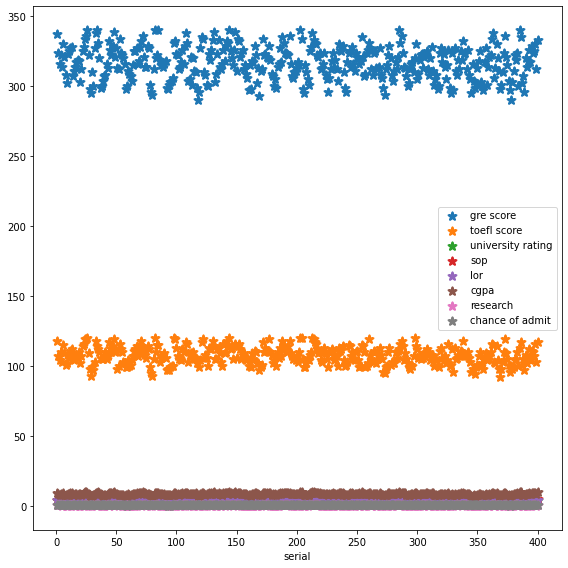

In [ ]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('serial')

ax.scatter(data_points[:,0],
           data_points[:,1], 
           marker="*",
           s = 70,
           linewidth=2,
           label = 'gre score')

ax.scatter(data_points[:,0],
           data_points[:,2], 
           marker="*",
           s = 70,
           linewidth=2,
           label = 'toefl score')

ax.scatter(data_points[:,0],
           data_points[:,3], 
           marker="*",
           s = 70,
           linewidth=2,
           label = 'university rating')

ax.scatter(data_points[:,0],
           data_points[:,4], 
           marker="*",
           s = 70,
           linewidth=2,
           label = 'sop')

ax.scatter(data_points[:,0],
           data_points[:,5], 
           marker="*",
           s = 70,
           linewidth=2,
           label = 'lor')

ax.scatter(data_points[:,0],
           data_points[:,6], 
           marker="*",
           s = 70,
           linewidth=2,
           label = 'cgpa')

ax.scatter(data_points[:,0],
           data_points[:,7], 
           marker="*",
           s = 70,
           linewidth=2,
           label = 'research')

ax.scatter(data_points[:,0],
           data_points[:,8], 
           marker="*",
           s = 70,
           linewidth=2,
           label = 'chance of admit')

plt.legend()

plt.tight_layout()

plt.show()

2. Separate the output (Y) column from the matrix of feature columns (X). Each column in X will be the
feature vectors.

In [ ]:
X = data_points[:, 0:data_points.shape[1]-2]

print(X, X.shape)

Y = data_points[:, data_points.shape[1]-1]

print(Y, Y.shape)

[[  1.   337.   118.   ...   4.5    4.5    9.65]
 [  2.   324.   107.   ...   4.     4.5    8.87]
 [  3.   316.   104.   ...   3.     3.5    8.  ]
 ...
 [398.   330.   116.   ...   5.     4.5    9.45]
 [399.   312.   103.   ...   3.5    4.     8.78]
 [400.   333.   117.   ...   5.     4.     9.66]] (400, 7)
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0

3. Seperate the data points for training and testing purposes. Keep 75% datapoints for training and the rest for testing.

In [ ]:
training_range = int(len(X)*.75)

print(training_range)

X_train = X[:training_range, 1:]

print(X_train, X_train.shape)

Y_train = Y[:training_range]

print(Y_train, Y_train.shape)

X_test = X[training_range:, 1:]

print(X_test, X_test.shape)

Y_test = Y[training_range:]

print(Y_test, Y_test.shape)

300
[[337.   118.     4.     4.5    4.5    9.65]
 [324.   107.     4.     4.     4.5    8.87]
 [316.   104.     3.     3.     3.5    8.  ]
 ...
 [320.   120.     3.     4.     4.5    9.11]
 [330.   114.     3.     4.5    4.5    9.24]
 [305.   112.     3.     3.     3.5    8.65]] (300, 6)
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 

4. Write the general equatoin for the given data points.

* $y = c_{0} + c_{1}x_{1} + c_{2}x_{2} + c_{3}x_{3} + c_{4}x_{4} + c_{5}x_{5} + c_{6}x_{6}$

* $c_{0}$ common for every data row.

* We will set $c_{0} = 1$

5. Prepend a ones column vector to X_train and X_test for setting the value of $c_{0}$

In [ ]:
# write code

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] (300,)
[[  1.   337.   118.   ...   4.5    4.5    9.65]
 [  1.   324.   107.   ...   4

6. Solve the system of equations, $Xc = Y$ to find the values of the c vector $(c_{0}, c_{1}, c_{2}, ..., c_{n})$. Use pseudo inverse to solve the system.

In [ ]:
def calculate_coefficients(X, Y):

  # write code

  return coefficients

coefficients = calculate_coefficients(X_train, Y_train)

print(coefficients, coefficients.shape)

[-1.39459294  0.00217839  0.00283955  0.00820868 -0.00492395  0.02835037
  0.11778839] (7,)


In [ ]:
def f_x(coefficients, x):

  # write code

  return result

y = f_x(coefficients, X_train[5, :])

print(y, Y_train[5])

0.8549041923692007 0.9


7. Plot the actual value along with the true value. Moreover show the error. 

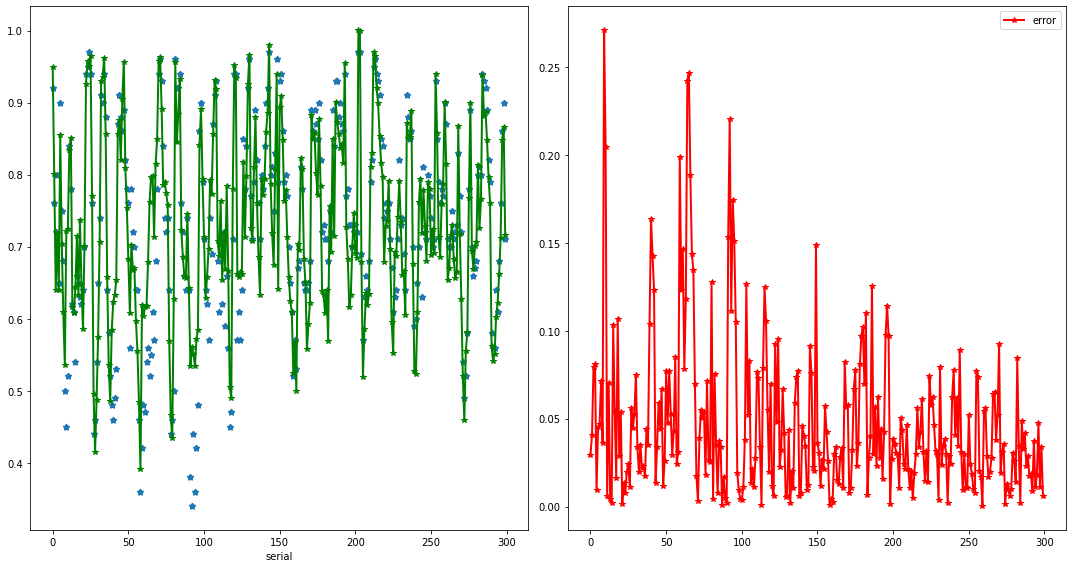

In [ ]:
fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(fig_width, fig_height))

error = []

predicted_value = []

actual_value = []

for x, y in zip(X_train, Y_train):

  prediction = f_x(coefficients, x)

  predicted_value.append(prediction)

  actual_value.append(y)

  error.append(np.abs(prediction - y))

predicted_value = np.array(predicted_value)

actual_value = np.array(actual_value)

ax[0].set_xlabel('serial')

ax[0].scatter(np.arange(len(X_train)),
              actual_value, 
              marker="*",
              s = 30,
              linewidth=2,
              label = 'chance of admit true')

ax[0].plot(np.arange(len(X_train)),
           predicted_value, 
           marker="*",
           linewidth=2,
           color = 'green',
           label = 'chance of admit predicted')


ax[1].plot(np.arange(len(X_train)),
           error, 
           marker="*",
           linewidth=2,
           color = 'r',
           label = 'error')

plt.legend()

plt.tight_layout()

plt.show()

8. Calculate the Mean Square Error, Root Mean Square Error and the Goodness of fit for the training data

In [ ]:
mse = (np.linalg.norm(predicted_value - actual_value)**2/len(predicted_value))

rmse = np.sqrt(mse)

# SSE = np.linalg.norm(predicted_value - actual_value)**2

# alternative equation

SSE = np.dot(error, error)

SST = np.linalg.norm(np.mean(actual_value) - actual_value)**2

r_2 = 1 - SSE/SST

print('Mean Square Error: {0:5.3f}'.format(mse))

print('Root Mean Square Error: {0:5.3f}'.format(rmse))

print('Goodness of Fit: {0:5.3f}%'.format(r_2*100))

1.270830894408424
Mean Square Error: 0.004
Root Mean Square Error: 0.065
Goodness of Fit: 79.355%


9. Plot the actual value along with the true value for the test data points. Moreover show the error. 

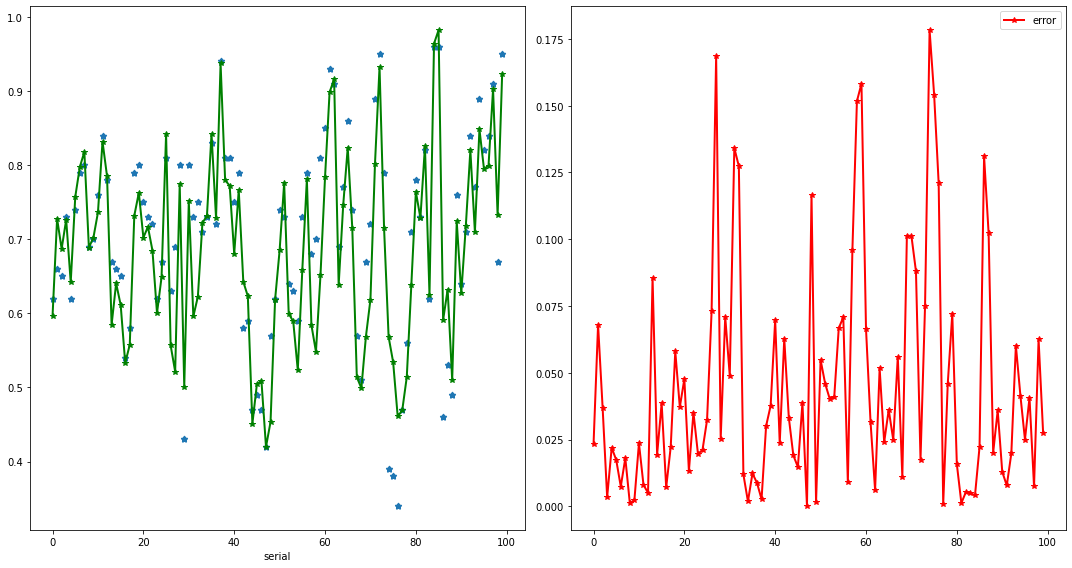

In [ ]:
fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(fig_width, fig_height))

error = []

predicted_value = []

actual_value = []

for x, y in zip(X_test, Y_test):

  prediction = f_x(coefficients, x)

  predicted_value.append(prediction)

  actual_value.append(y)

  error.append(np.abs(prediction - y))

predicted_value = np.array(predicted_value)

actual_value = np.array(actual_value)

ax[0].set_xlabel('serial')

ax[0].scatter(np.arange(len(X_test)),
              actual_value, 
              marker="*",
              s = 30,
              linewidth=2,
              label = 'chance of admit true')

ax[0].plot(np.arange(len(X_test)),
           predicted_value, 
           marker="*",
           linewidth=2,
           color = 'green',
           label = 'chance of admit predicted')


ax[1].plot(np.arange(len(X_test)),
           error, 
           marker="*",
           linewidth=2,
           color = 'r',
           label = 'error')

plt.legend()

plt.tight_layout()

plt.show()

10. Calculate the Mean Square Error, Root Mean Square Error and the Goodness of fit for the training data

In [ ]:
mse = (np.linalg.norm(predicted_value - actual_value)**2/len(predicted_value))

rmse = np.sqrt(mse)

# SSE = np.linalg.norm(predicted_value - actual_value)**2

# alternative equation

SSE = np.dot(error, error)

SST = np.linalg.norm(np.mean(actual_value) - actual_value)**2

r_2 = 1 - SSE/SST

print('Mean Square Error: {0:5.3f}'.format(mse))

print('Root Mean Square Error: {0:5.3f}'.format(rmse))

print('Goodness of Fit: {0:5.3f}%'.format(r_2*100))

Mean Square Error: 0.004
Root Mean Square Error: 0.061
Goodness of Fit: 80.185%
